In [259]:
from pymatgen import MPRester
from pymatgen import Structure
from pymatgen import symmetry
from pymatgen.electronic_structure.core import Spin
import numpy as np
with MPRester("dnNf3TZDVumSw1eQ") as m:

    # Structure for material id
    structure = m.get_structure_by_material_id("mp-661")
    bandstructure = m.get_bandstructure_by_material_id("mp-661",line_mode=True)

In [260]:
from pymatgen.electronic_structure.bandstructure import BandStructure
from pymatgen.electronic_structure.bandstructure import BandStructureSymmLine
from pymatgen import Lattice, Molecule
from pymatgen.symmetry.bandstructure import HighSymmKpath
from pymatgen.electronic_structure.plotter import BSPlotter

In [261]:
plotter=BSPlotter(bandstructure)
#premier crochet c est la cle, ensuite la branche ensuite le spin up '1' ensuite la bande
#print(np.size(plotter.bs_plot_data()['energy'][0]['1'][8]))
#plotter.bs_plot_data()['energy'][0]['1'][8]
#premier crochet est la cle ensuite c est la branche
#print(np.size(plotter.bs_plot_data()['distances'][0]))
#plotter.bs_plot_data()['distances'][0]

Voilà la structure des bandes électroniques de mon matériau. 
Sa bande interdite est caractérisée telle que : 
{'direct': True, 'energy': 4.039, 'transition': '\\Gamma-\\Gamma'}
Toutes les valeurs d énergie affichées dans ce document sont en eV.
Malheureusement, le Materials Project n étant pas parfait, quelques différences sont visibles entre le graphe ci-dessous et    celui du MP.
Certaines valeurs d énergie ne correspondent pas non plus et certaines approximations sont grossières.
En effet, l énergie de Fermi du matériau est 6.05759842 et l énergie maximale de la dernière bande de valence est 5.9871.
Pourtant la valeur de l énergie maximale de la dernière bande de valende utilisée pour le graphe shifté de l énergie de Fermi  est 0.0.


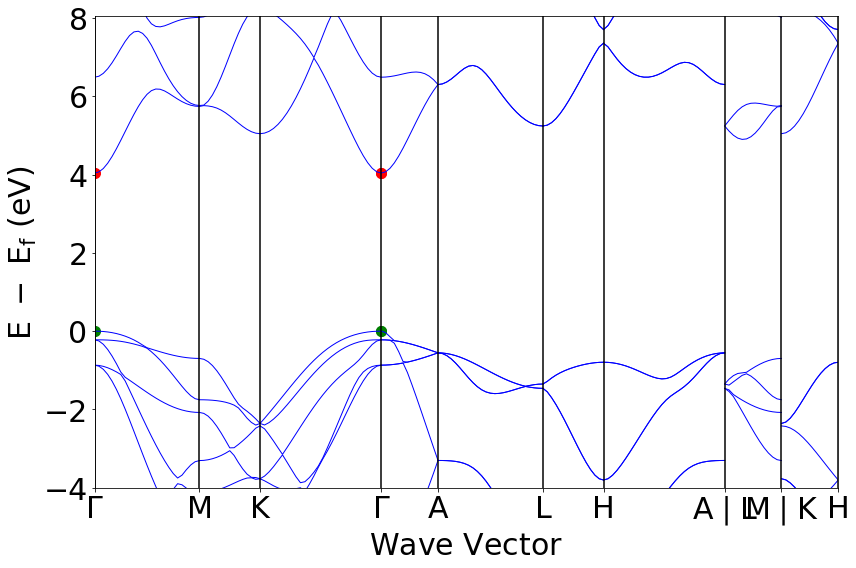

In [262]:
plotter.get_plot(vbm_cbm_marker=True)
print('Voilà la structure des bandes électroniques de mon matériau. \nSa bande interdite est caractérisée telle que : ')
print(bandstructure.get_band_gap())
print('Toutes les valeurs d énergie affichées dans ce document sont en eV.')
print('Malheureusement, le Materials Project n étant pas parfait, quelques différences sont visibles entre le graphe ci-dessous et    celui du MP.')
print('Certaines valeurs d énergie ne correspondent pas non plus et certaines approximations sont grossières.')
print('En effet, l énergie de Fermi du matériau est '+str(bandstructure.efermi)+' et l énergie maximale de la dernière bande de valence est 5.9871.')
print('Pourtant la valeur de l énergie maximale de la dernière bande de valende utilisée pour le graphe shifté de l énergie de Fermi  est 0.0.')

In [263]:
print('Nous pouvons récupérer l énergie maximale de la dernière bande de valence ainsi que l énergie minimale de la première bande de conduction. Nous pouvons également récupérer le numéro (index) des bandes correspondantes, que  nous pourrons utiliser dans la suite du document.')
print('Voici donc ces informations, d abord pour la dernière bande de valence et ensuite pour la première bande de conduction.')
print('\n')
print(bandstructure.get_vbm()['energy'])
print(bandstructure.get_vbm()['band_index'][Spin.up])
print('\n')
print(bandstructure.get_cbm()['energy'])
print(bandstructure.get_cbm()['band_index'][Spin.up])

Nous pouvons récupérer l énergie maximale de la dernière bande de valence ainsi que l énergie minimale de la première bande de conduction. Nous pouvons également récupérer le numéro (index) des bandes correspondantes, que  nous pourrons utiliser dans la suite du document.
Voici donc ces informations, d abord pour la dernière bande de valence et ensuite pour la première bande de conduction.


5.9871
[7]


10.0261
[8]


In [264]:
#Ceci est une fonction calculant la pente sur chaque bande et renvoyant un vecteur contenant toutes les valeurs
def pente(no_band):
    results=np.zeros(9)
    for i in range(9):
        y=plotter.bs_plot_data()['energy'][i]['1'][no_band][0]-plotter.bs_plot_data()['energy'][i]['1'][no_band][-1]
        x=plotter.bs_plot_data()['distances'][i][-1]-plotter.bs_plot_data()['distances'][i][0]
        results[i]=np.abs(y)/x
    return results

Voici la pente associée à chaque branche pour la dernière bande de valence : 
[0.60177428 2.48314097 1.76274738 0.8843103  0.6875694  0.83239789
 0.17924978 1.04286089 2.49469934]
La dernière bande de valence a donc une pente maximale en valeur absolue de 2.4946993401721085 à la 9ème branche, c est-à-dire K-H présente le plus de dispersion.
La dernière bande de valence a donc une pente minimale en valeur absolue de 0.17924977599747977 à la 7ème branche, c est-à-dire H-A présente le moins de dispersion


Voici la pente associée à chaque branche pour la première bande de conduction : 
[1.46921999 1.04049736 0.75213146 3.60662703 0.91396842 3.1617067
 0.78935681 0.79753815 3.68606183]
La première bande de conduction a donc une pente maximale en valeur absolue de 3.6860618319716916 à la 9ème branche, c est-à-  dire K-H présente le plus de dispersion.
La première bande de conduction a donc une pente minimale en valeur absolue de 0.7521314620878407 à la 3ème branche, c est-à-  dire K-Gamma p

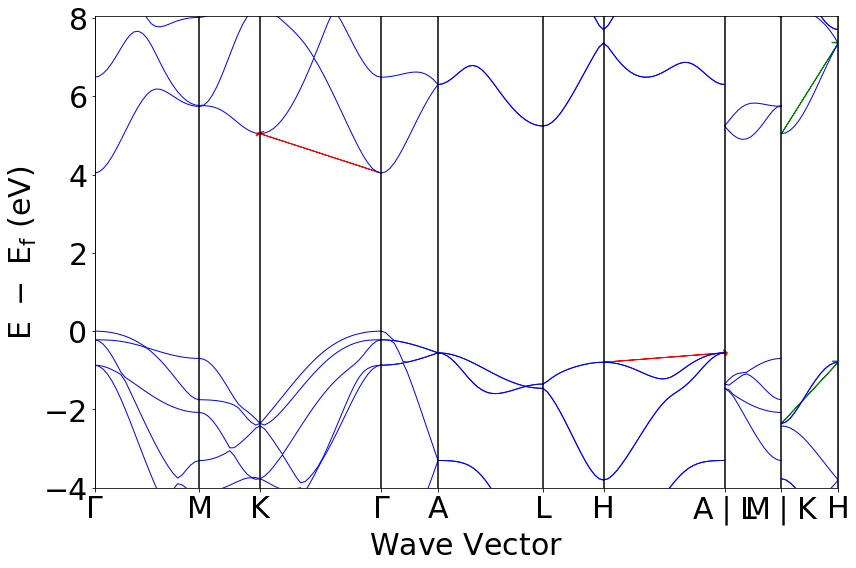

In [265]:
pente_vb=pente(7)
print('Voici la pente associée à chaque branche pour la dernière bande de valence : ')
print(pente_vb)
print('La dernière bande de valence a donc une pente maximale en valeur absolue de '+str(pente_vb.max())+' à la '+str(np.where(pente_vb==pente_vb.max())[0][0]+1)+'ème branche, c est-à-dire K-H présente le plus de dispersion.')
print('La dernière bande de valence a donc une pente minimale en valeur absolue de '+str(pente_vb.min())+' à la '+str(np.where(pente_vb==pente_vb.min())[0][0]+1)+'ème branche, c est-à-dire H-A présente le moins de dispersion')
print('\n')

pente_cb=pente(8)
print('Voici la pente associée à chaque branche pour la première bande de conduction : ')
print(pente_cb)
print('La première bande de conduction a donc une pente maximale en valeur absolue de '+str(pente_cb.max())+' à la '+str(np.where(pente_cb==pente_cb.max())[0][0]+1)+'ème branche, c est-à-  dire K-H présente le plus de dispersion.')
print('La première bande de conduction a donc une pente minimale en valeur absolue de '+str(pente_cb.min())+' à la '+str(np.where(pente_cb==pente_cb.min())[0][0]+1)+'ème branche, c est-à-  dire K-Gamma présente le moins de dispersion.')
print('\n')

fig=plotter.get_plot()
import pylab as p
p.arrow(plotter.bs_plot_data()['distances'][8][0], plotter.bs_plot_data()['energy'][8]['1'][7][0], plotter.bs_plot_data()['distances'][8][-1]-plotter.bs_plot_data()['distances'][8][0], plotter.bs_plot_data()['energy'][8]['1'][7][-1]-plotter.bs_plot_data()['energy'][8]['1'][7][0], fc="g", ec="g",head_width=0.15, head_length=0.03)
p.arrow(plotter.bs_plot_data()['distances'][6][0], plotter.bs_plot_data()['energy'][6]['1'][7][0], plotter.bs_plot_data()['distances'][6][-1]-plotter.bs_plot_data()['distances'][6][0], np.abs(plotter.bs_plot_data()['energy'][6]['1'][7][-1]-plotter.bs_plot_data()['energy'][6]['1'][7][0]), fc="r", ec="r",head_width=0.15, head_length=0.03)
p.arrow(plotter.bs_plot_data()['distances'][8][0], plotter.bs_plot_data()['energy'][8]['1'][8][0], plotter.bs_plot_data()['distances'][8][-1]-plotter.bs_plot_data()['distances'][8][0], plotter.bs_plot_data()['energy'][8]['1'][8][-1]-plotter.bs_plot_data()['energy'][8]['1'][8][0], fc="g", ec="g",head_width=0.15, head_length=0.03)
p.arrow(plotter.bs_plot_data()['distances'][2][-1], plotter.bs_plot_data()['energy'][2]['1'][8][-1], -(plotter.bs_plot_data()['distances'][2][-1]-plotter.bs_plot_data()['distances'][2][0]), -(plotter.bs_plot_data()['energy'][2]['1'][8][-1]-plotter.bs_plot_data()['energy'][2]['1'][8][0]), fc="r", ec="r",head_width=0.15, head_length=0.03)
print('Sur ce graphe, les dispersions les plus faibles et plus fortes sont indiquées par des flèches rouges et vertes respectivement.')

La valeur maximale de l énergie de la dernière bande de valence sur le plot qui est shift par l énergie de Fermi est : 
0.0
Elle se trouve à une distance sur les abscisses de : 
3.1652828702715743
Les deux valeurs à gauche et à droite de l énergie max sont : 
-0.002200000000000202
-0.0365000000000002
dont leur distance sur les abscisses sont respectivement : 
3.115734790050042
3.2135081995458026
On peut donc utiliser la fonction polyfit avec ces trois points pour trouver une expression quadratique au voisinage de        l énergie maximale de la bande de valence (voir graphe).
La masse effective, en fraction de masse de l electron et en supposant une dispersion parabolique au sommet de la dernière      bande de valence, est : 
-0.464908544535161


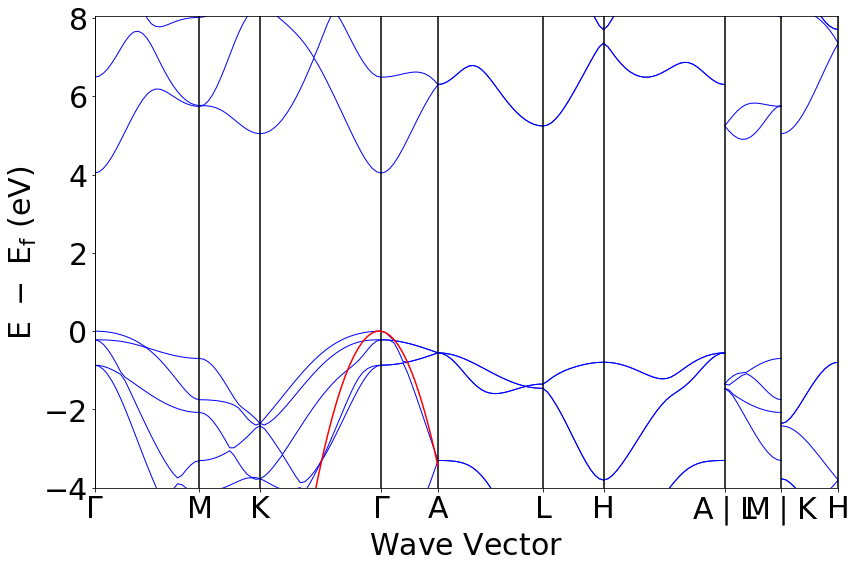

In [266]:
print('La valeur maximale de l énergie de la dernière bande de valence sur le plot qui est shift par l énergie de Fermi est : ')
print(plotter.bs_plot_data()['energy'][2]['1'][7][-1])
print('Elle se trouve à une distance sur les abscisses de : ')
print(plotter.bs_plot_data()['distances'][2][-1])
print('Les deux valeurs à gauche et à droite de l énergie max sont : ')
print(plotter.bs_plot_data()['energy'][2]['1'][7][-2])
print(plotter.bs_plot_data()['energy'][3]['1'][7][1])
print('dont leur distance sur les abscisses sont respectivement : ')
print(plotter.bs_plot_data()['distances'][2][-2])
print(plotter.bs_plot_data()['distances'][3][1])
print('On peut donc utiliser la fonction polyfit avec ces trois points pour trouver une expression quadratique au voisinage de        l énergie maximale de la bande de valence (voir graphe).')
x=np.array([plotter.bs_plot_data()['distances'][2][-2],plotter.bs_plot_data()['distances'][2][-1], plotter.bs_plot_data()['distances'][3][1]])
y=np.array([plotter.bs_plot_data()['energy'][2]['1'][7][-2], plotter.bs_plot_data()['energy'][2]['1'][7][-1], plotter.bs_plot_data()['energy'][3]['1'][7][1]])
p=np.polyfit(x, y, 2)
X=np.append(plotter.bs_plot_data()['distances'][2], plotter.bs_plot_data()['distances'][3][1:])
Y=p[0]*X**2 + p[1]*X + p[2]
plotter.get_plot()
import matplotlib.pyplot as plt
plt.plot(X,Y,'-r')
print('La masse effective, en fraction de masse de l electron et en supposant une dispersion parabolique au sommet de la dernière      bande de valence, est : ')
from scipy.constants import hbar, m_e
masse_eff=((hbar**2)*10**(19)*10**(20))/(1.602176634*2*p[0])
print(masse_eff/m_e)

La valeur minimale de l énergie de la première bande de conduction sur le plot qui est shift par l énergie de Fermi est : 
4.039
Elle se trouve à une distance sur les abscisses de : 
3.1652828702715743
Les deux valeurs à gauche et à droite de l énergie max sont : 
4.0702
4.0699000000000005
dont leur distance sur les abscisses sont respectivement : 
3.115734790050042
3.2135081995458026
On peut donc utiliser la fonction polyfit avec ces trois points pour trouver une expression quadratique au voisinage de        l énergie minimale de la bande de conduction (voir graphe).
La masse effective, en fraction de masse de l electron et en supposant une dispersion parabolique à la base de la première      bande de conduction, est : 
0.29321875882601883


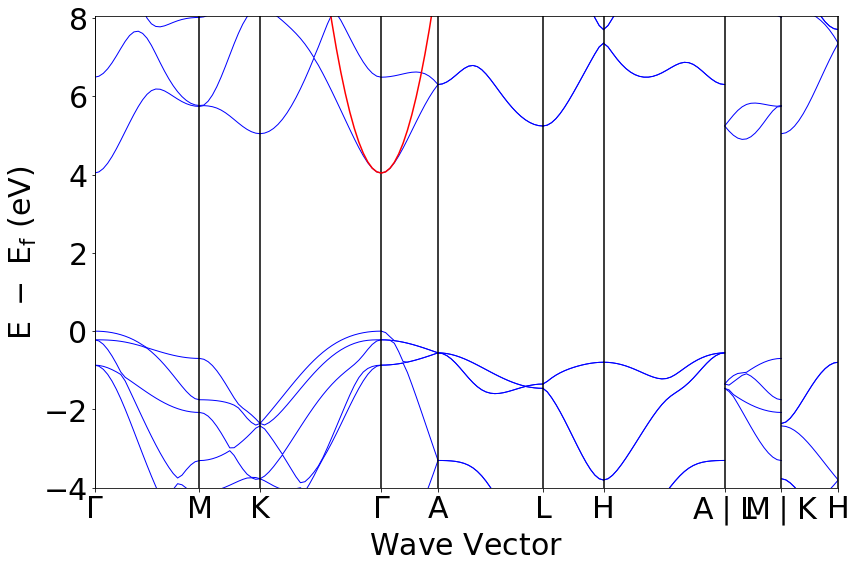

In [267]:
print('La valeur minimale de l énergie de la première bande de conduction sur le plot qui est shift par l énergie de Fermi est : ')
print(plotter.bs_plot_data()['energy'][2]['1'][8][-1])
print('Elle se trouve à une distance sur les abscisses de : ')
print(plotter.bs_plot_data()['distances'][2][-1])
print('Les deux valeurs à gauche et à droite de l énergie max sont : ')
print(plotter.bs_plot_data()['energy'][2]['1'][8][-2])
print(plotter.bs_plot_data()['energy'][3]['1'][8][1])
print('dont leur distance sur les abscisses sont respectivement : ')
print(plotter.bs_plot_data()['distances'][2][-2])
print(plotter.bs_plot_data()['distances'][3][1])
print('On peut donc utiliser la fonction polyfit avec ces trois points pour trouver une expression quadratique au voisinage de        l énergie minimale de la bande de conduction (voir graphe).')
x=np.array([plotter.bs_plot_data()['distances'][2][-2],plotter.bs_plot_data()['distances'][2][-1], plotter.bs_plot_data()['distances'][3][1]])
y=np.array([plotter.bs_plot_data()['energy'][2]['1'][8][-2], plotter.bs_plot_data()['energy'][2]['1'][8][-1], plotter.bs_plot_data()['energy'][3]['1'][8][1]])
p=np.polyfit(x, y, 2)
X=np.append(plotter.bs_plot_data()['distances'][2], plotter.bs_plot_data()['distances'][3][1:])
Y=p[0]*X**2 + p[1]*X + p[2]
plotter.get_plot()
import matplotlib.pyplot as plt
plt.plot(X,Y,'-r')
print('La masse effective, en fraction de masse de l electron et en supposant une dispersion parabolique à la base de la première      bande de conduction, est : ')
from scipy.constants import hbar, m_e
masse_eff=((hbar**2)*10**(19)*10**(20))/(1.602176634*2*p[0])
print(masse_eff/m_e)